## Let's first import all needed modules and define the database connection information

In [2]:
import configparser
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation


## use config file for database connection information
config = configparser.ConfigParser()
config.read('env.ini')

## establish conntection
conn = psycopg2.connect(database=config.get('USERINFO', 'DB_NAME'), 
                        host=config.get('USERINFO', 'HOST'), 
                        user=config.get('USERINFO', 'USER'), 
                        password=config.get('USERINFO', 'PASS'), 
                        port=config.get('USERINFO', 'PORT'))

## Let's create the field
 - Create a rectangle with [`matplotlib.patches.rectangle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle) function 
 - Create figure and set of subplots with [`matploytlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots) function
 - Add rectangle patch to figure axes with [`matplotlib.axes.Axes.add_patch()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html)

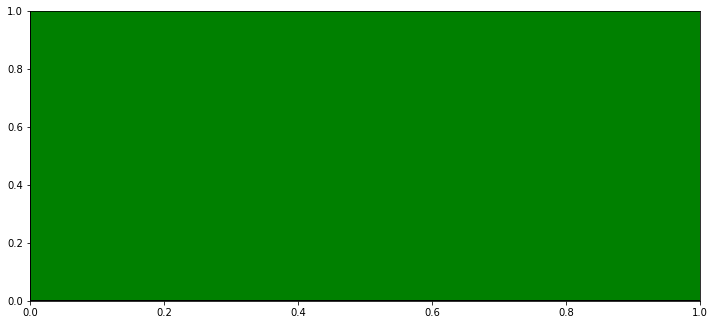

In [10]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=2,
                         edgecolor='black', facecolor='green', zorder=0)
fig, ax = plt.subplots(1, figsize=(12, 5.33))
ax.add_patch(rect)

## Next let's add our field line markers
 - Use the function [`matplotlib.axes.Axes.axvline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html) and [`matplotlib.axes.Axes.axhline()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axhline.html) to draw field lines on the plot
 - Use the function [`matplotlib.axes.Axes.text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) to plot the field line numbers

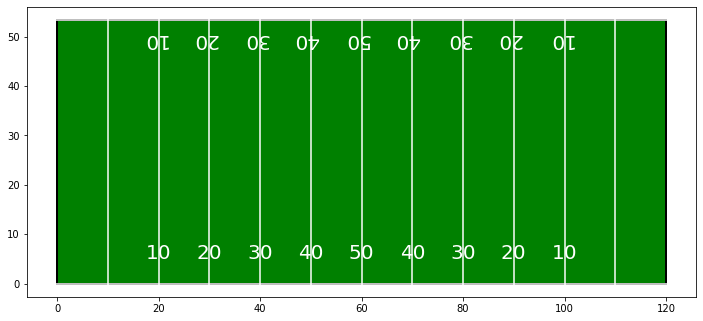

In [11]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=2,
                         edgecolor='black', facecolor='green', zorder=0)
fig, ax = plt.subplots(1, figsize=(12, 5.33))
ax.add_patch(rect)

# plot line numbers
for a in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]:
    ax.axvline(x=a, color='white')
# added to set y-axis up for the numbers
ax.axhline(y=0, color='white')
ax.axhline(y=53.3, color='white')

# plot numbers
for x in range(20, 110, 10):
    numb = x
    if x > 50:
        numb = 120-x
    ax.text(x, 5, str(numb - 10), horizontalalignment='center', fontsize=20, color='white')
    ax.text(x-0.95, 53.3-5, str(numb-10), 
             horizontalalignment='center', fontsize=20, color='white',rotation=180)

## Create hash marks for the field and remove axis
 - Using [`matplotlib.axes.Axes.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) to create dashed lines on the field
 - Using [`matplotlib.pyplot.axis()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html) to turn off the axis

(-6.0, 126.0, -2.665, 55.964999999999996)

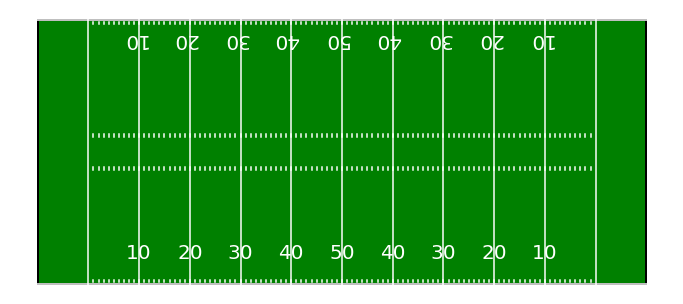

In [12]:
rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=2,
                         edgecolor='black', facecolor='green', zorder=0)
fig, ax = plt.subplots(1, figsize=(12, 5.33))
ax.add_patch(rect)

# plot line numbers
for a in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]:
    ax.axvline(x=a, color='white')
# added to set y-axis up for the numbers
ax.axhline(y=0, color='white')
ax.axhline(y=53.3, color='white')

# plot numbers
for x in range(20, 110, 10):
    numb = x
    if x > 50:
        numb = 120-x
    ax.text(x, 5, str(numb - 10), horizontalalignment='center', fontsize=20, color='white')
    ax.text(x-0.95, 53.3-5, str(numb-10), 
             horizontalalignment='center', fontsize=20, color='white',rotation=180)

# hash marks
for x in range(11, 110):
    ax.plot([x, x], [0.4, 0.7], color='white')
    ax.plot([x, x], [53.0, 52.5], color='white')
    ax.plot([x, x], [23, 23.66], color='white')
    ax.plot([x, x], [29.66, 30.33], color='white')

# hide axis
plt.axis('off')

## Create a function for creating the field

In [13]:
def generate_field():
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=2,
                            edgecolor='black', facecolor='green', zorder=0)
    fig, ax = plt.subplots(1, figsize=(12, 5.33))
    ax.add_patch(rect)

    # plot line numbers
    for a in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]:
        ax.axvline(x=a, color='white')
    # added to set y-axis up for the numbers
    ax.axhline(y=0, color='white')
    ax.axhline(y=53.3, color='white')

    # plot numbers
    for x in range(20, 110, 10):
        numb = x
        if x > 50:
            numb = 120-x
        ax.text(x, 5, str(numb - 10), horizontalalignment='center', fontsize=20, color='white')
        ax.text(x-0.95, 53.3-5, str(numb-10), 
                horizontalalignment='center', fontsize=20, color='white',rotation=180)

    # hash marks
    for x in range(11, 110):
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [23, 23.66], color='white')
        ax.plot([x, x], [29.66, 30.33], color='white')

    # hide axis
    plt.axis('off')
    
    return fig, ax


## Let's look at how we would plot a single moment for the players and ball on our field

In [151]:
game_id = 2018111900
play_id = 4120
frame = 1

sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='home' and frameid={frame}"\
.format(game=game_id, play=play_id, frame=frame)
home_team = pd.read_sql(sql, conn)

# query tracking dtaa for the away team
sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='away' and frameid={frame}"\
.format(game=game_id, play=play_id, frame=frame)
away_team = pd.read_sql(sql, conn)

#query tracking data for the football
sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='football' and frameid={frame}"\
.format(game=game_id, play=play_id, frame=frame)
football = pd.read_sql(sql, conn)

# generate field
fig, ax = generate_field()

# visualize positions with scatter plot on our field 
ax.plot(home_team['x'], home_team['y'], 'bo')
ax.plot(away_team['x'], away_team['y'], 'ro')
ax.plot(football['x'], football['y'], 'yo')

# query play description and possession team, add them in the title
sql = """SELECT gameid, playid, playdescription, possessionteam FROM play 
            WHERE gameid = {game} AND playid = {play}""".format(game=game_id, play=play_id, frame=frame)
play_info = pd.read_sql(sql, conn).to_dict('records') 
plt.title('Possession team: {team}\nPlay: {play}'.format(team=play_info[0]['possessionteam'], 
                                                            play=play_info[0]['playdescription']), wrap=True)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Possession team: KC\nPlay: (12:15) P.Mahomes pass deep middle to T.Hill for 73 yards, TOUCHDOWN. PENALTY on KC-T.Hill, Taunting, 15 yards, enforced between downs.')

## Now we need to define the plotting data as function

In [152]:
# create function to take in game_id, play_id, and frame arguments
def draw_play(game_id, play_id, frame):
    # query tracking data for the home team
    sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='home' and frameid={frame}"\
    .format(game=game_id, play=play_id, frame=frame)
    home_team = pd.read_sql(sql, conn)

    # query tracking dtaa for the away team
    sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='away' and frameid={frame}"\
    .format(game=game_id, play=play_id, frame=frame)
    away_team = pd.read_sql(sql, conn)

    #query tracking data for the football
    sql = "SELECT * FROM tracking WHERE gameid={game} AND playid={play} AND team='football' and frameid={frame}"\
    .format(game=game_id, play=play_id, frame=frame)
    football = pd.read_sql(sql, conn)
    
    # visualize positions with scatter plot on our field 
    ax.plot(home_team['x'], home_team['y'], 'bo')
    ax.plot(away_team['x'], away_team['y'], 'ro')
    ax.plot(football['x'], football['y'], 'yo')
    

    # query play description and possession team and add them in the title
    sql = """SELECT gameid, playid, playdescription, possessionteam FROM play 
             WHERE gameid = {game} AND playid = {play}""".format(game=game_id, play=play_id, frame=frame)
    play_info = pd.read_sql(sql, conn).to_dict('records') 
    plt.title('Possession team: {team}\nPlay: {play}'.format(team=play_info[0]['possessionteam'], 
                                                             play=play_info[0]['playdescription']), wrap=True)


## Now that we have functions for creating the field and generating player positions, we can animate things!

To do this I will use the [`matplotlib.animation.FuncAnimation()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) function. This function needs to iterate over something. In our case, we will iterate over the position function we created. 

In [153]:
# call field function
fig, ax = generate_field()

# create iterative animation function using the position function
# we will have to select the game_id and play_id specifically
def update_plot(i):
    draw_play(game_id=2018111900, 
    play_id=4120,
    frame=i) 

# additionally we need to know how many frames exist for the play (will get this from the database)
anim = FuncAnimation(fig, update_plot, frames=113, interval=10)
fig.set_figheight(8)
fig.set_figwidth(14)
plt.show()


<IPython.core.display.Javascript object>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(
